<a href="https://colab.research.google.com/github/Anisha-Tasneem/Customer-Segmentation-and-Data-Analysis-using-Social-Media/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/499B-datasets/Dataset.csv')

# Drop irrelevant columns like Customer ID, City Code, Product Code
data = data.drop(columns=['Customer ID', 'City Code', 'Product Code'])

# Convert categorical variables like Gender to numerical values
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Normalize the data
scaler = MinMaxScaler()
data[['Age', 'Total Bill (Taka)', 'Customer Value']] = scaler.fit_transform(data[['Age', 'Total Bill (Taka)', 'Customer Value']])

# Split data into features and target
X = data.drop(columns=['Customer Value'])
y = data['Customer Value']

# Convert dataframe to numpy arrays
X = X.to_numpy()
y = y.to_numpy()

# Split the data into training and testing sets

In [2]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for RNN input (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the RNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_absolute_error

model = Sequential([
    SimpleRNN(units=64, input_shape=(1, 3), activation='relu'),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predict customer values for the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Accuracy:", mae)


Epoch 1/50
125/125 [==============================] - 3s 9ms/step - loss: 0.2203 - val_loss: 0.2152
Epoch 2/50
125/125 [==============================] - 1s 5ms/step - loss: 0.2140 - val_loss: 0.2140
Epoch 3/50
125/125 [==============================] - 1s 5ms/step - loss: 0.2137 - val_loss: 0.2159
Epoch 4/50
125/125 [==============================] - 1s 5ms/step - loss: 0.2138 - val_loss: 0.2136
Epoch 5/50
125/125 [==============================] - 0s 3ms/step - loss: 0.2133 - val_loss: 0.2139
Epoch 6/50
125/125 [==============================] - 0s 3ms/step - loss: 0.2133 - val_loss: 0.2141
Epoch 7/50
125/125 [==============================] - 0s 3ms/step - loss: 0.2132 - val_loss: 0.2136
Epoch 8/50
125/125 [==============================] - 0s 2ms/step - loss: 0.2130 - val_loss: 0.2134
Epoch 9/50
125/125 [==============================] - 0s 2ms/step - loss: 0.2139 - val_loss: 0.2132
Epoch 10/50
125/125 [==============================] - 0s 3ms/step - loss: 0.2132 - val_loss: 0.2132

In [3]:
from sklearn.metrics import classification_report

# Binarize predictions and true values
threshold = 0.5  # Adjust as needed
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# Print classification report
print(classification_report(y_test_binary, y_pred_binary))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       690
           1       0.00      0.00      0.00       310

    accuracy                           0.69      1000
   macro avg       0.34      0.50      0.41      1000
weighted avg       0.48      0.69      0.56      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


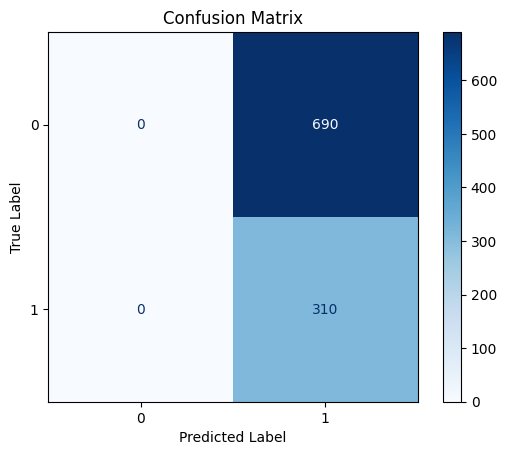

In [4]:
# Binarize the true and predicted values based on the median
threshold = np.median(y_test)
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (y_pred > threshold).astype(int)

# Create confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary, labels=[0, 1])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

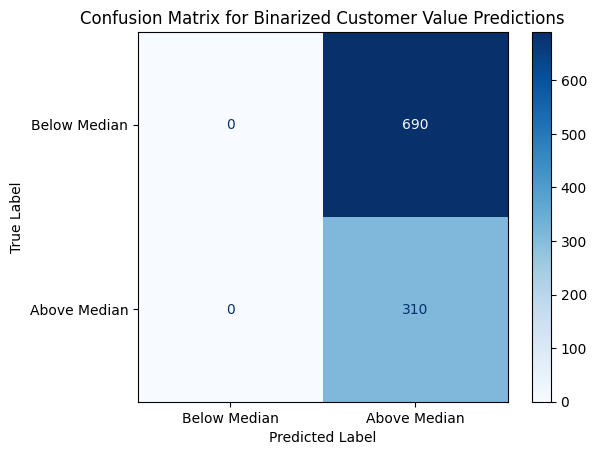

In [5]:

# Binarize the true and predicted values based on the median
threshold = np.median(y_test)
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (y_pred > threshold).astype(int)

# Create confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary, labels=[0, 1])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Below Median', 'Above Median'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Binarized Customer Value Predictions')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [6]:
# Binarize the true and predicted values based on the median
threshold = np.median(y_test)
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = ((y_pred.ravel() > threshold).astype(int))

# Check the distribution of the binary labels
print("Distribution of binary true labels:", np.bincount(y_test_binary))
print("Distribution of binary predicted labels:", np.bincount(y_pred_binary))

Distribution of binary true labels: [690 310]
Distribution of binary predicted labels: [   0 1000]


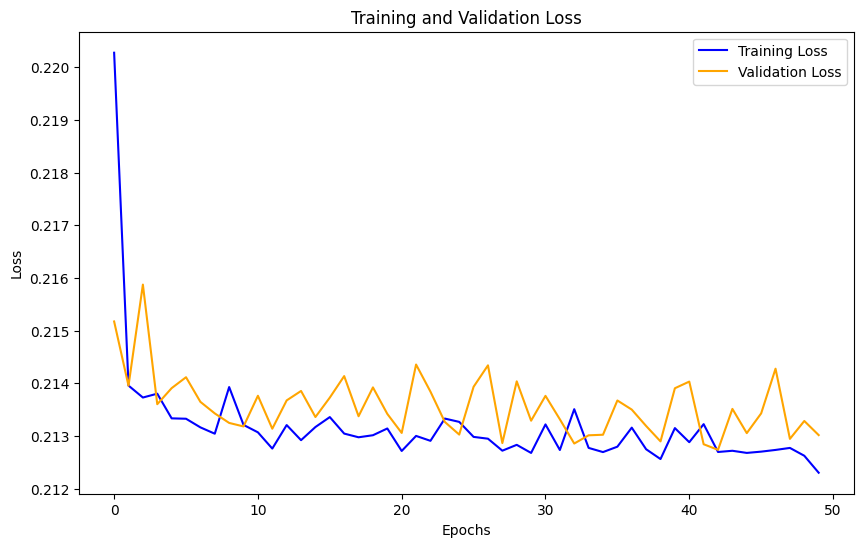

In [7]:
# Check if history is not None
if history is not None:
    # Extract training loss and validation loss from the history object
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create a plot
    plt.figure(figsize=(10, 6))

    # Plot training and validation loss
    plt.plot(train_loss, label='Training Loss', color='blue')
    plt.plot(val_loss, label='Validation Loss', color='orange')

    # Add title and labels
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    # Add legend
    plt.legend()

    # Show plot
    plt.show()
else:
    print("Training history is not available.")